## House Sales in King County USA

Miaomiao Xu



1. import package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

2. import data source

In [2]:
path = r'C:\Users\Miaomiao Xu\Desktop\kc_house_data.csv'
df= pd.read_csv(path, header=0)

show data head

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


3. Data Preprocessing
    
    - Data drop missing values

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing value in our data set. Lets see if there is 0 in our dataset. If so, whether it is reasonable or not.

In [5]:
df.describe().min()

id               21613.000000
price            21613.000000
bedrooms             0.000000
bathrooms            0.000000
sqft_living        290.000000
sqft_lot           520.000000
floors               0.539989
waterfront           0.000000
view                 0.000000
condition            0.650743
grade                1.000000
sqft_above         290.000000
sqft_basement        0.000000
yr_built            29.373411
yr_renovated         0.000000
zipcode             53.505026
lat                  0.138564
long              -122.519000
sqft_living15      399.000000
sqft_lot15         651.000000
dtype: float64

I think it is reasonable to be 0 for the above variables.

- Data Normalization

In [6]:
df['price']= df['price']/df['price'].max()
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_above']= df['sqft_above']/df['sqft_above'].max()
df['sqft_basement']= df['sqft_basement']/df['sqft_basement'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()
df['lat'] = df['lat']/df['lat'].max()
df['long'] = df['long']/df['long'].max()

In [7]:
df_1 = pd.get_dummies(df['yr_built']>=2000)
df_2 = df_1.rename(columns = {'False': 'Yr_built < 2000', 'True': 'Yr_built >=2000'}, inplace= False)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,0.070141,3.370842,2.114757,0.153612,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,0.190052,0.060479,1971.005136,84.402258,98077.939805,0.995447,1.007410,0.319896,0.014656
std,2.876566e+09,0.047679,0.930062,0.770163,0.067832,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,0.088001,0.091821,29.373411,401.679240,53.505026,0.002900,0.001161,0.110369,0.031341
min,1.000102e+06,0.009740,0.000000,0.000000,0.021418,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.030818,0.000000,1900.000000,0.000000,98001.000000,0.986988,1.000000,0.064251,0.000747
25%,2.123049e+09,0.041812,3.000000,1.750000,0.105391,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.126461,0.000000,1951.000000,0.000000,98033.000000,0.993583,1.006677,0.239936,0.005854
50%,3.904930e+09,0.058442,3.000000,2.250000,0.141064,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.165781,0.000000,1975.000000,0.000000,98065.000000,0.995693,1.007542,0.296296,0.008747
75%,7.308900e+09,0.083766,4.000000,2.500000,0.188331,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,0.234857,0.116183,1997.000000,0.000000,98118.000000,0.997915,1.008350,0.380032,0.011574
max,9.900000e+09,1.000000,33.000000,8.000000,1.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,1.000000,1.000000,2015.000000,2015.000000,98199.000000,1.000000,1.009925,1.000000,1.000000


- Format data type

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

It seems like there is no big problem relias with data type.

- Data Binning

4. data description
    - data correlation

In [10]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,-0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,-0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,-0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,-0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,-0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,-0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,-0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,0.106500,-0.092824,-0.003406


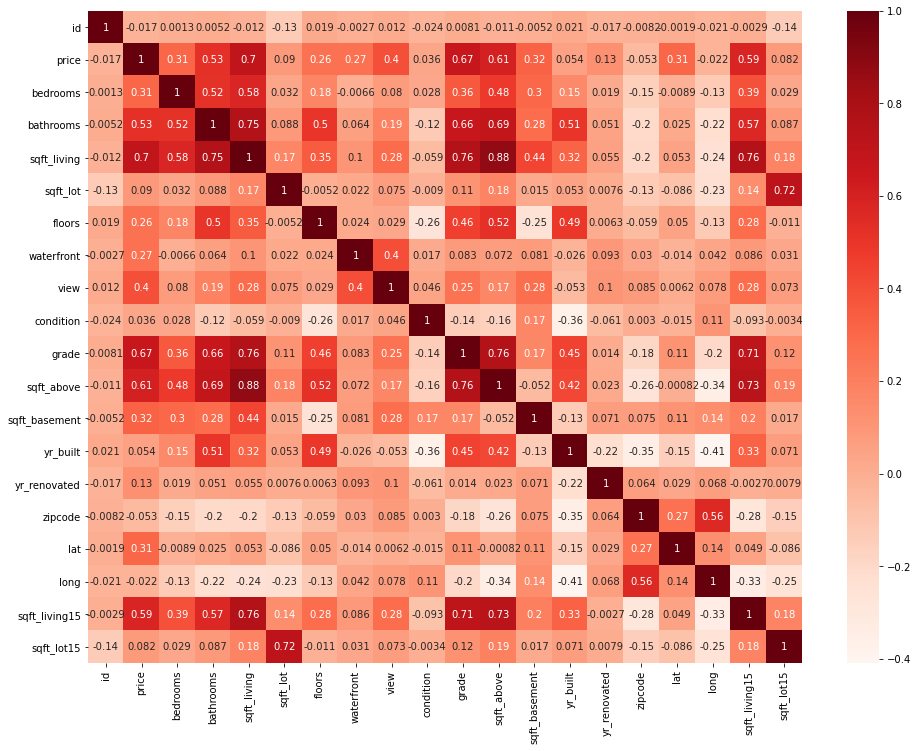

In [11]:
import matplotlib.pyplot as plt
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Import for visulization

In [12]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 15.0)

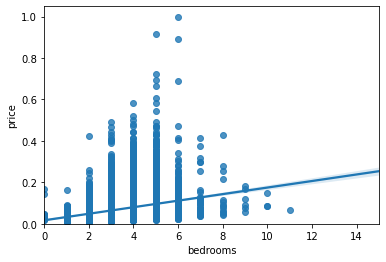

In [13]:
sns.regplot(x="bedrooms", y="price", data=df)
plt.ylim(0,)
plt.xlim(0,15)

(0.0, 1.0)

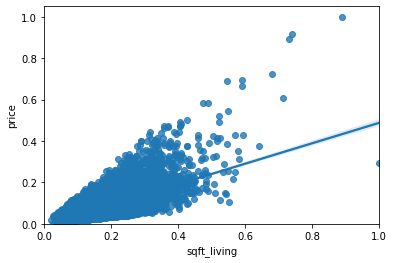

In [14]:
sns.regplot(x="sqft_living", y="price", data=df)
plt.ylim(0,)
plt.xlim(0,)

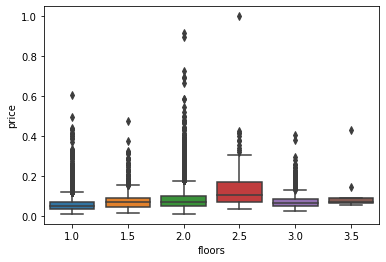

In [15]:
sns.boxplot(x="floors", y="price", data=df)

Seems like that box plot works for floors and conditions

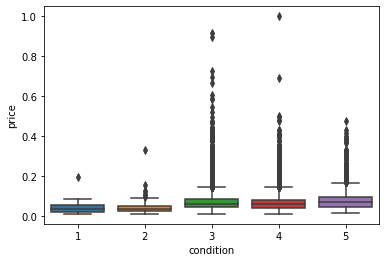

In [16]:
sns.boxplot(x="condition", y="price", data=df)

- correlation and causation

In [17]:
from scipy import stats

In [18]:
pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3083495981456399  with a P-value of P = 0.0


In [19]:
pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5251375054139614  with a P-value of P = 0.0


In [20]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7020350546117993  with a P-value of P = 0.0


Seems like that the living area sqft has high correlation with price.

In [21]:
pearson_coef, p_value = stats.pearsonr(df['sqft_lot'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.08966086058710007  with a P-value of P = 7.972504510411444e-40


In [22]:
pearson_coef, p_value = stats.pearsonr(df['floors'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.25679388755072285  with a P-value of P = 1.6e-322


In [23]:
pearson_coef, p_value = stats.pearsonr(df['waterfront'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.26636943403060215  with a P-value of P = 0.0


In [24]:
pearson_coef, p_value = stats.pearsonr(df['view'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.39729348829450195  with a P-value of P = 0.0


In [25]:
pearson_coef, p_value = stats.pearsonr(df['condition'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.036361789128998574  with a P-value of P = 8.93565406242687e-08


In [26]:
pearson_coef, p_value = stats.pearsonr(df['grade'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6674342560202385  with a P-value of P = 0.0


In [27]:
pearson_coef, p_value = stats.pearsonr(df['sqft_above'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.605567298356078  with a P-value of P = 0.0


In [28]:
pearson_coef, p_value = stats.pearsonr(df['sqft_basement'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3238160207119811  with a P-value of P = 0.0


In [29]:
pearson_coef, p_value = stats.pearsonr(df['yr_built'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.054011531494792764  with a P-value of P = 1.9298728093948347e-15


In [30]:
pearson_coef, p_value = stats.pearsonr(df['lat'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3070034799952186  with a P-value of P = 0.0


In [31]:
pearson_coef, p_value = stats.pearsonr(df['long'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.021626241039305542  with a P-value of P = 0.0014750922063340702


Therefore, the important features include:
    - bedrooms
    - bathrooms
    - sqft_living
    - sqft_lot
    - floors
    - waterfront
    - view
    - condition
    - ...
Now, we can build model.

5. Model Selection
    - Linear Regression
    - Polynominal Regression 
    - SVR
    - Decision Tree

In [32]:
Y= df[['price']]
X= df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode']]

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.score(X,Y)

0.6522942964482401

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,Y)
lin_reg2.score(x_poly, Y)

0.7548066000787159

In [40]:
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_scaled = sc1.fit_transform(X)
sc2=StandardScaler()
y_scaled = np.ravel(Y)

from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_scaled,y_scaled)
svr_reg.score(x_scaled,y_scaled)

0.22062612748981625

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X,Y)
dt_reg.score(X,Y)


0.9991219840910088